In [ ]:
import pandas as pd

social_media_df = pd.read_csv('/content/social_media_interactions_contaminated.csv')
demographics_df = pd.read_csv('/content/customer_demographics_contaminated.csv')
transactions_df = pd.read_csv('/content/customer_transactions_contaminated.csv')

print("Social Media Interactions DataFrame:")
display(social_media_df.head())

print("\nCustomer Demographics DataFrame:")
display(demographics_df.head())

print("\nCustomer Transactions DataFrame:")
display(transactions_df.head())

Social Media Interactions DataFrame:


,CustomerID,InteractionID,InteractionDate,Platform,InteractionType,Sentiment
0,2dcb9523-356b-40b2-a67b-1f27797de261,e5d15761-d0a7-4329-89e3-79a892c56097,2023-07-11,NaN,Comment,NaN
1,e12c37b3-7d4d-472f-9fd8-0df2cb3001aa,02f9f376-70ae-4fcd-9070-1db977939948,2023-07-06,Twitter,Share,NaN
2,08a911a3-65e6-4f5d-a6a1-ae7ddcbe28a2,a83fa04c-f109-4f24-8ce1-2078154f6a1c,2024-05-24,Instagram,Comment,Neutral
3,efdfdfc9-5dbb-4478-911a-101a390a0285,28a69c4b-a2e4-4c74-a130-1132d7733fdf,2023-11-01,Instagram,Like,Neutral
4,ca1e90f6-0e5f-492e-ab92-252ff540da18,d9d1c6f8-5e15-4738-b52b-13c2982420cc,2023-07-08,Instagram,Like,NaN



Customer Demographics DataFrame:


,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate
0,9207fa75-5758-48d1-94ad-19c041e0520f,51.0,Female,Jensenberg,Low,2022-11-17
1,5fb09cd8-a473-46f7-80bd-6e49cf509078,NaN,Female,Castilloport,High,2020-07-21
2,c139496e-cc89-498a-bd90-1fb4627b6cff,37.0,Male,Lake Jennifertown,NaN,2021-01-01
3,50118139-7264-428f-81cc-a25fddc5d6dd,44.0,Male,Port Carl,Medium,2024-06-10
4,7d1f2bbc-8d16-4fbc-9b37-ece3324e8ed4,50.0,Female,Jessebury,High,2023-08-24



Customer Transactions DataFrame:


,CustomerID,TransactionID,TransactionDate,Amount,ProductCategory,PaymentMethod
0,60567026-f719-4cd6-849e-137e86d8938f,5ff75116-0a50-4d04-80fb-31e5ccbb0769,2024-05-15,117.64,Clothing,PayPal
1,4090ba85-b111-4f75-a792-c777965f5255,2c39b9fe-ff57-4d39-9321-9f5cdf187aa1,2023-04-26,466.14,Health & Beauty,Bank Transfer
2,9223891b-73ff-4d5c-b8ae-13ece82ee28b,f79588dd-3db9-4ffa-97f8-7de0e64259f1,2022-09-23,563.99,Clothing,Debit Card
3,9243eebc-938f-480c-8564-16d503d250de,401c0fc9-60df-4455-ad78-67c132f9897d,2024-04-15,254.44,Automotive,PayPal
4,6e3e8eb8-bc0f-4ffe-9f74-5d5efec9502f,2034aebc-8280-4254-a667-92bcd1c2be4f,2024-06-03,590.52,Home & Garden,Bank Transfer


In [ ]:
demographics_df.info()
print("\nMissing values in demographics_df:")
display(demographics_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerID   3200 non-null   object
 1   Age          2909 non-null   object
 2   Gender       3200 non-null   object
 3   Location     3200 non-null   object
 4   IncomeLevel  2897 non-null   object
 5   SignupDate   3200 non-null   object
dtypes: object(6)
memory usage: 150.1+ KB

Missing values in demographics_df:


,0
CustomerID,0
Age,291
Gender,0
Location,0
IncomeLevel,303
SignupDate,0



Descriptive statistics for Age:


,Age
count,2875.000000
mean,45.325565
std,19.503218
min,-1.000000
25%,31.000000
50%,45.000000
75%,58.000000
max,150.000000


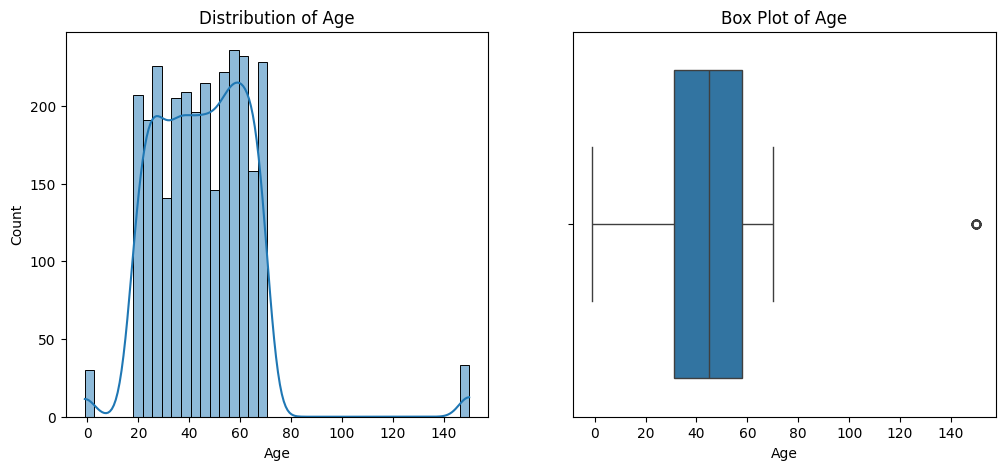


Value counts for Gender:


,count
Gender,
Female,1610
Male,1590



Value counts for Location:


,count
Location,
Port Michael,6
Michaelton,5
West Michael,4
Michaelville,4
Port Adam,4
...,...
Castillotown,1
Danielfurt,1
Jessicaland,1



Value counts for IncomeLevel:


,count
IncomeLevel,
High,1004
Low,985
Medium,908


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert 'Age' to numeric, coercing errors to NaN
demographics_df['Age'] = pd.to_numeric(demographics_df['Age'], errors='coerce')

# Analyze 'Age'
print("\nDescriptive statistics for Age:")
display(demographics_df['Age'].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(demographics_df['Age'].dropna(), kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=demographics_df['Age'].dropna())
plt.title('Box Plot of Age')
plt.show()

# Examine categorical columns
print("\nValue counts for Gender:")
display(demographics_df['Gender'].value_counts())

print("\nValue counts for Location:")
display(demographics_df['Location'].value_counts())

print("\nValue counts for IncomeLevel:")
display(demographics_df['IncomeLevel'].value_counts())

In [ ]:
# Impute missing 'Age' with the median after removing unrealistic values
median_age = demographics_df[(demographics_df['Age'] >= 0) & (demographics_df['Age'] <= 100)]['Age'].median()
demographics_df['Age'].fillna(median_age, inplace=True)

# Remove unrealistic 'Age' values
demographics_df = demographics_df[(demographics_df['Age'] >= 0) & (demographics_df['Age'] <= 100)].copy()

# Impute missing 'IncomeLevel' with the mode
mode_income = demographics_df['IncomeLevel'].mode()[0]
demographics_df['IncomeLevel'].fillna(mode_income, inplace=True)

# Verify cleaning
print("\nMissing values after cleaning:")
display(demographics_df.isnull().sum())

print("\nValue counts for IncomeLevel after cleaning:")
display(demographics_df['IncomeLevel'].value_counts())

print("\nDescriptive statistics for Age after cleaning:")
display(demographics_df['Age'].describe())


Missing values after cleaning:


/tmp/ipython-input-698859738.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  demographics_df['Age'].fillna(median_age, inplace=True)
/tmp/ipython-input-698859738.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

,0
CustomerID,0
Age,0
Gender,0
Location,0
IncomeLevel,0
SignupDate,0



Value counts for IncomeLevel after cleaning:


,count
IncomeLevel,
High,1277
Low,970
Medium,890



Descriptive statistics for Age after cleaning:


,Age
count,3137.000000
mean,44.633726
std,14.570577
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,70.000000


In [ ]:
transactions_df.info()
print("\nMissing values in transactions_df:")
display(transactions_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       3200 non-null   object
 1   TransactionID    3200 non-null   object
 2   TransactionDate  3200 non-null   object
 3   Amount           2896 non-null   object
 4   ProductCategory  2901 non-null   object
 5   PaymentMethod    3200 non-null   object
dtypes: object(6)
memory usage: 150.1+ KB

Missing values in transactions_df:


,0
CustomerID,0
TransactionID,0
TransactionDate,0
Amount,304
ProductCategory,299
PaymentMethod,0



Descriptive statistics for Amount:


,Amount
count,2866.000000
mean,490.916479
std,298.737439
min,-100.000000
25%,228.240000
50%,497.285000
75%,746.935000
max,999.860000


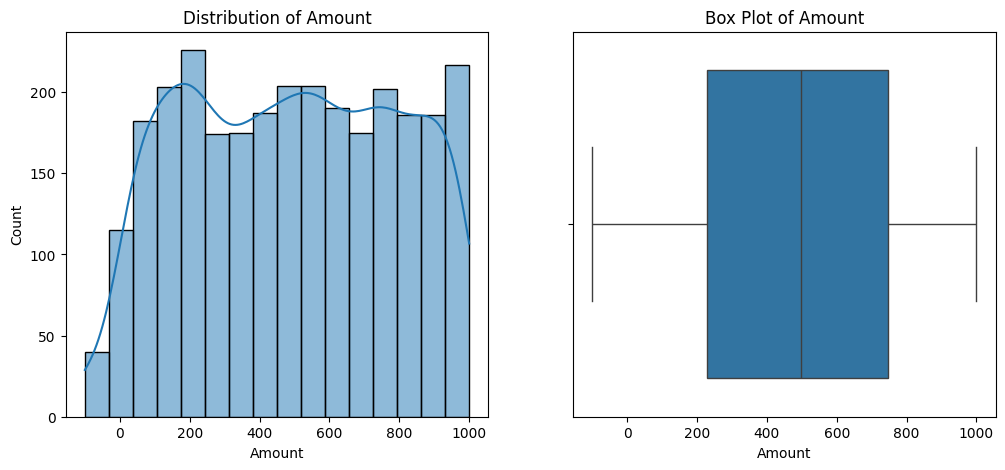

In [ ]:
# Convert 'Amount' to numeric, coercing errors to NaN
transactions_df['Amount'] = pd.to_numeric(transactions_df['Amount'], errors='coerce')

# Investigate 'Amount'
print("\nDescriptive statistics for Amount:")
display(transactions_df['Amount'].describe())

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(transactions_df['Amount'].dropna(), kde=True)
plt.title('Distribution of Amount')

plt.subplot(1, 2, 2)
sns.boxplot(x=transactions_df['Amount'].dropna())
plt.title('Box Plot of Amount')
plt.show()

In [ ]:
# Impute missing 'Amount' with the median
median_amount = transactions_df['Amount'].median()
transactions_df['Amount'].fillna(median_amount, inplace=True)

# Examine categorical columns
print("\nValue counts for ProductCategory:")
display(transactions_df['ProductCategory'].value_counts())

print("\nValue counts for PaymentMethod:")
display(transactions_df['PaymentMethod'].value_counts())

# Clean inconsistencies in 'ProductCategory' and 'PaymentMethod'
transactions_df['ProductCategory'] = transactions_df['ProductCategory'].replace({'Electronics ': 'Electronics', 'Clothing ': 'Clothing', 'Home & Garden ': 'Home & Garden', 'Health & Beauty ': 'Health & Beauty', 'Automotive ': 'Automotive'})
transactions_df['PaymentMethod'] = transactions_df['PaymentMethod'].replace({'Credit Card ': 'Credit Card', 'Debit Card ': 'Debit Card', 'PayPal ': 'PayPal', 'Bank Transfer ': 'Bank Transfer'})


# Impute missing 'ProductCategory' and 'PaymentMethod' with the mode
mode_product_category = transactions_df['ProductCategory'].mode()[0]
transactions_df['ProductCategory'].fillna(mode_product_category, inplace=True)

mode_payment_method = transactions_df['PaymentMethod'].mode()[0]
transactions_df['PaymentMethod'].fillna(mode_payment_method, inplace=True)


Value counts for ProductCategory:


/tmp/ipython-input-1409954745.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions_df['Amount'].fillna(median_amount, inplace=True)


,count
ProductCategory,
Clothing,598
Electronics,595
Automotive,576
Health & Beauty,570
Home & Garden,562



Value counts for PaymentMethod:


,count
PaymentMethod,
Debit Card,809
Credit Card,804
PayPal,794
Bank Transfer,793


/tmp/ipython-input-1409954745.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions_df['ProductCategory'].fillna(mode_product_category, inplace=True)
/tmp/ipython-input-1409954745.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

In [ ]:
# Verify cleaning
print("\nMissing values after cleaning:")
display(transactions_df.isnull().sum())

print("\nValue counts for ProductCategory after cleaning:")
display(transactions_df['ProductCategory'].value_counts())

print("\nValue counts for PaymentMethod after cleaning:")
display(transactions_df['PaymentMethod'].value_counts())


Missing values after cleaning:


,0
CustomerID,0
TransactionID,0
TransactionDate,0
Amount,0
ProductCategory,0
PaymentMethod,0



Value counts for ProductCategory after cleaning:


,count
ProductCategory,
Clothing,897
Electronics,595
Automotive,576
Health & Beauty,570
Home & Garden,562



Value counts for PaymentMethod after cleaning:


,count
PaymentMethod,
Debit Card,809
Credit Card,804
PayPal,794
Bank Transfer,793


In [ ]:
social_media_df.info()
print("\nMissing values in social_media_df:")
display(social_media_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3200 entries, 0 to 3199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CustomerID       3200 non-null   object
 1   InteractionID    3200 non-null   object
 2   InteractionDate  3200 non-null   object
 3   Platform         2889 non-null   object
 4   InteractionType  3200 non-null   object
 5   Sentiment        2871 non-null   object
dtypes: object(6)
memory usage: 150.1+ KB

Missing values in social_media_df:


,0
CustomerID,0
InteractionID,0
InteractionDate,0
Platform,311
InteractionType,0
Sentiment,329


In [ ]:
print("\nValue counts for Platform before cleaning:")
display(social_media_df['Platform'].value_counts())

print("\nValue counts for InteractionType before cleaning:")
display(social_media_df['InteractionType'].value_counts())

print("\nValue counts for Sentiment before cleaning:")
display(social_media_df['Sentiment'].value_counts())

# Clean inconsistencies in categorical columns
social_media_df['Platform'] = social_media_df['Platform'].str.strip()
social_media_df['InteractionType'] = social_media_df['InteractionType'].str.strip()
social_media_df['Sentiment'] = social_media_df['Sentiment'].str.strip()

# Impute missing values with the mode
mode_platform = social_media_df['Platform'].mode()[0]
social_media_df['Platform'].fillna(mode_platform, inplace=True)

mode_sentiment = social_media_df['Sentiment'].mode()[0]
social_media_df['Sentiment'].fillna(mode_sentiment, inplace=True)

# Verify cleaning and imputation
print("\nMissing values after cleaning and imputation:")
display(social_media_df.isnull().sum())

print("\nValue counts for Platform after cleaning:")
display(social_media_df['Platform'].value_counts())

print("\nValue counts for InteractionType after cleaning:")
display(social_media_df['InteractionType'].value_counts())

print("\nValue counts for Sentiment after cleaning:")
display(social_media_df['Sentiment'].value_counts())


Value counts for Platform before cleaning:


,count
Platform,
Instagram,976
Twitter,967
Facebook,946



Value counts for InteractionType before cleaning:


,count
InteractionType,
Comment,1079
Share,1067
Like,1054



Value counts for Sentiment before cleaning:


,count
Sentiment,
Positive,962
Negative,925
Neutral,918
Very Negative,34
Very Positive,32



Missing values after cleaning and imputation:


/tmp/ipython-input-2581804563.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  social_media_df['Platform'].fillna(mode_platform, inplace=True)
/tmp/ipython-input-2581804563.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

,0
CustomerID,0
InteractionID,0
InteractionDate,0
Platform,0
InteractionType,0
Sentiment,0



Value counts for Platform after cleaning:


,count
Platform,
Instagram,1287
Twitter,967
Facebook,946



Value counts for InteractionType after cleaning:


,count
InteractionType,
Comment,1079
Share,1067
Like,1054



Value counts for Sentiment after cleaning:


,count
Sentiment,
Positive,1291
Negative,925
Neutral,918
Very Negative,34
Very Positive,32


In [ ]:
merged_df = pd.merge(demographics_df, transactions_df, on='CustomerID', how='outer')
merged_df = pd.merge(merged_df, social_media_df, on='CustomerID', how='outer')
display(merged_df.head())

,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate,TransactionID,TransactionDate,Amount,ProductCategory,PaymentMethod,InteractionID,InteractionDate,Platform,InteractionType,Sentiment
0,0009fdd2-ae63-45ca-8d5b-d0ea98381f7b,21.0,Female,Lake George,Low,2020-11-09,86cd577d-4ffd-498d-94ce-e68e6cca8865,2023-10-26,389.69,Home & Garden,Bank Transfer,26af70c2-acba-461c-95b8-8200de6b154a,2024-02-16,Instagram,Share,Positive
1,0009fdd2-ae63-45ca-8d5b-d0ea98381f7b,21.0,Female,Lake George,Low,2020-11-09,86cd577d-4ffd-498d-94ce-e68e6cca8865,2023-10-26,389.69,Home & Garden,Bank Transfer,4d9427f2-30fe-4298-ab66-8490e29202b5,2024-04-22,Facebook,Share,Neutral
2,000c6bbd-533a-432d-922c-ab64197e71c5,25.0,Male,North Oliviaton,High,2019-11-06,NaN,NaN,NaN,NaN,NaN,fff3e62c-3c78-4883-9a34-1d8aad5c1582,2023-07-11,Instagram,Like,Negative
3,000c6bbd-533a-432d-922c-ab64197e71c5,25.0,Male,North Oliviaton,High,2019-11-06,NaN,NaN,NaN,NaN,NaN,1b2e64c0-80f5-40ed-8d19-072eeb7f2b23,2024-03-15,Instagram,Comment,Positive
4,000c6bbd-533a-432d-922c-ab64197e71c5,25.0,Male,North Oliviaton,High,2019-11-06,NaN,NaN,NaN,NaN,NaN,72c0bb82-9307-4ba4-8925-a5100d3d0e56,2024-03-12,Instagram,Like,Neutral


In [ ]:
merged_df.to_csv('Merged_data_clean.csv', index=False)

In [ ]:
df = pd.read_csv('/content/Merged_data_clean.csv')
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
display(df.head())
df.info()

ValueError: time data "26/02/2024" doesn't match format "%Y-%m-%d", at position 23. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

**Reasoning**:
The previous attempt to convert 'TransactionDate' to datetime failed due to inconsistent date formats. Use the `dayfirst=True` and `errors='coerce'` arguments in `pd.to_datetime` to handle the different formats and any potential parsing errors.



In [ ]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce', dayfirst=True)
display(df.head())
df.info()

/tmp/ipython-input-353521261.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce', dayfirst=True)


,CustomerID,Age,Gender,Location,IncomeLevel,SignupDate,TransactionID,TransactionDate,Amount,ProductCategory,PaymentMethod,InteractionID,InteractionDate,Platform,InteractionType,Sentiment
0,0009fdd2-ae63-45ca-8d5b-d0ea98381f7b,21.0,Female,Lake George,Low,2020-11-09,86cd577d-4ffd-498d-94ce-e68e6cca8865,2023-10-26,389.69,Home & Garden,Bank Transfer,26af70c2-acba-461c-95b8-8200de6b154a,2024-02-16,Instagram,Share,Positive
1,0009fdd2-ae63-45ca-8d5b-d0ea98381f7b,21.0,Female,Lake George,Low,2020-11-09,86cd577d-4ffd-498d-94ce-e68e6cca8865,2023-10-26,389.69,Home & Garden,Bank Transfer,4d9427f2-30fe-4298-ab66-8490e29202b5,2024-04-22,Facebook,Share,Neutral
2,000c6bbd-533a-432d-922c-ab64197e71c5,25.0,Male,North Oliviaton,High,2019-11-06,NaN,NaT,NaN,NaN,NaN,fff3e62c-3c78-4883-9a34-1d8aad5c1582,2023-07-11,Instagram,Like,Negative
3,000c6bbd-533a-432d-922c-ab64197e71c5,25.0,Male,North Oliviaton,High,2019-11-06,NaN,NaT,NaN,NaN,NaN,1b2e64c0-80f5-40ed-8d19-072eeb7f2b23,2024-03-15,Instagram,Comment,Positive
4,000c6bbd-533a-432d-922c-ab64197e71c5,25.0,Male,North Oliviaton,High,2019-11-06,NaN,NaT,NaN,NaN,NaN,72c0bb82-9307-4ba4-8925-a5100d3d0e56,2024-03-12,Instagram,Like,Neutral


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6567 entries, 0 to 6566
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       6567 non-null   object        
 1   Age              6461 non-null   float64       
 2   Gender           6461 non-null   object        
 3   Location         6461 non-null   object        
 4   IncomeLevel      6461 non-null   object        
 5   SignupDate       6461 non-null   object        
 6   TransactionID    4840 non-null   object        
 7   TransactionDate  4687 non-null   datetime64[ns]
 8   Amount           4840 non-null   float64       
 9   ProductCategory  4840 non-null   object        
 10  PaymentMethod    4840 non-null   object        
 11  InteractionID    4899 non-null   object        
 12  InteractionDate  4899 non-null   object        
 13  Platform         4899 non-null   object        
 14  InteractionType  4899 non-null   object 

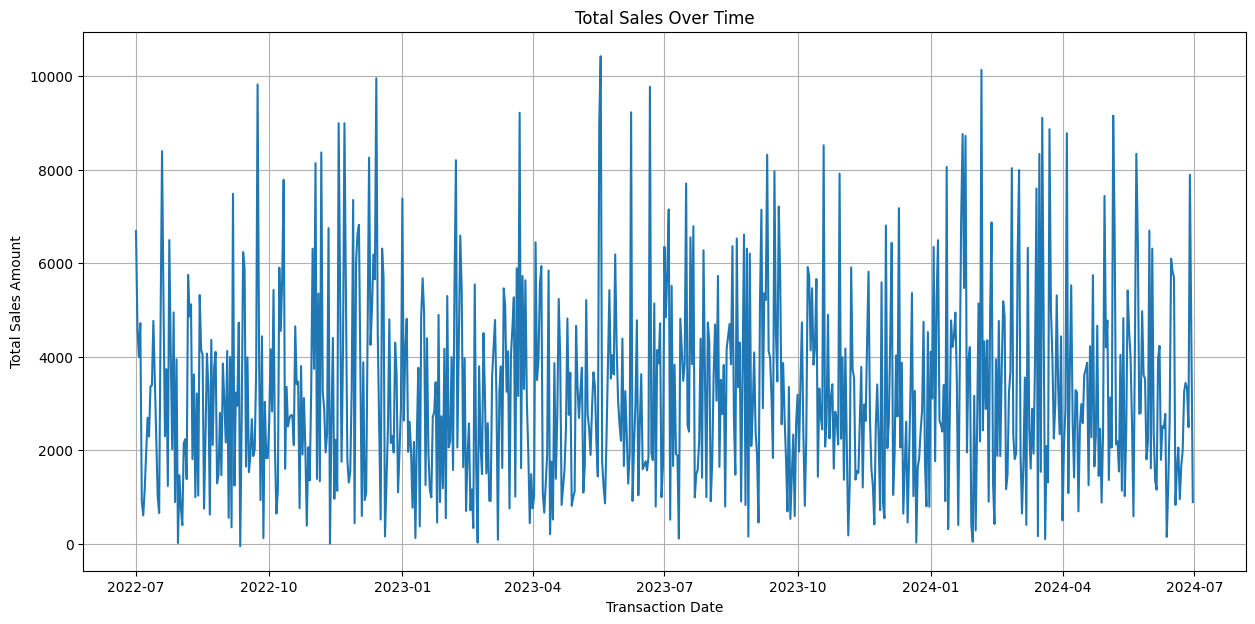

In [ ]:
# Group by TransactionDate and sum the Amount
daily_sales = df.groupby('TransactionDate')['Amount'].sum().reset_index()

# Sort by date to ensure the line plot is ordered correctly
daily_sales = daily_sales.sort_values('TransactionDate')

# Create the line plot
plt.figure(figsize=(15, 7))
plt.plot(daily_sales['TransactionDate'], daily_sales['Amount'])
plt.title('Total Sales Over Time')
plt.xlabel('Transaction Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

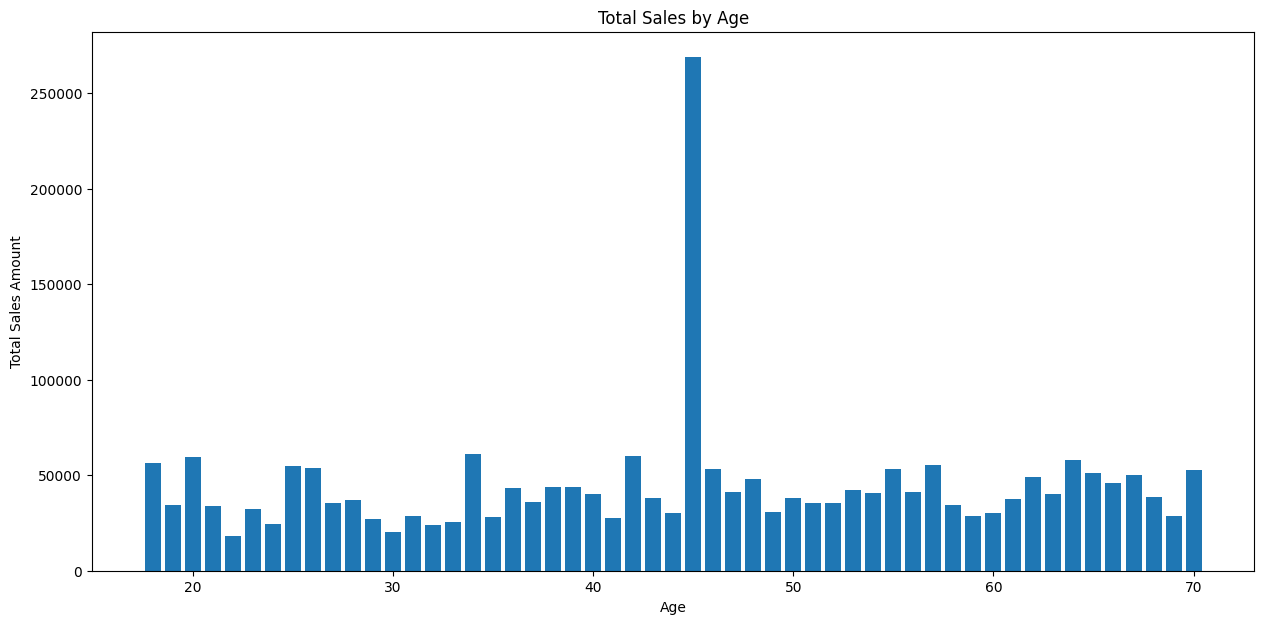

In [ ]:
sales_by_age = df.groupby('Age')['Amount'].sum().reset_index()
sales_by_age = sales_by_age.sort_values('Age')

plt.figure(figsize=(15, 7))
plt.bar(sales_by_age['Age'], sales_by_age['Amount'])
plt.title('Total Sales by Age')
plt.xlabel('Age')
plt.ylabel('Total Sales Amount')
plt.show()

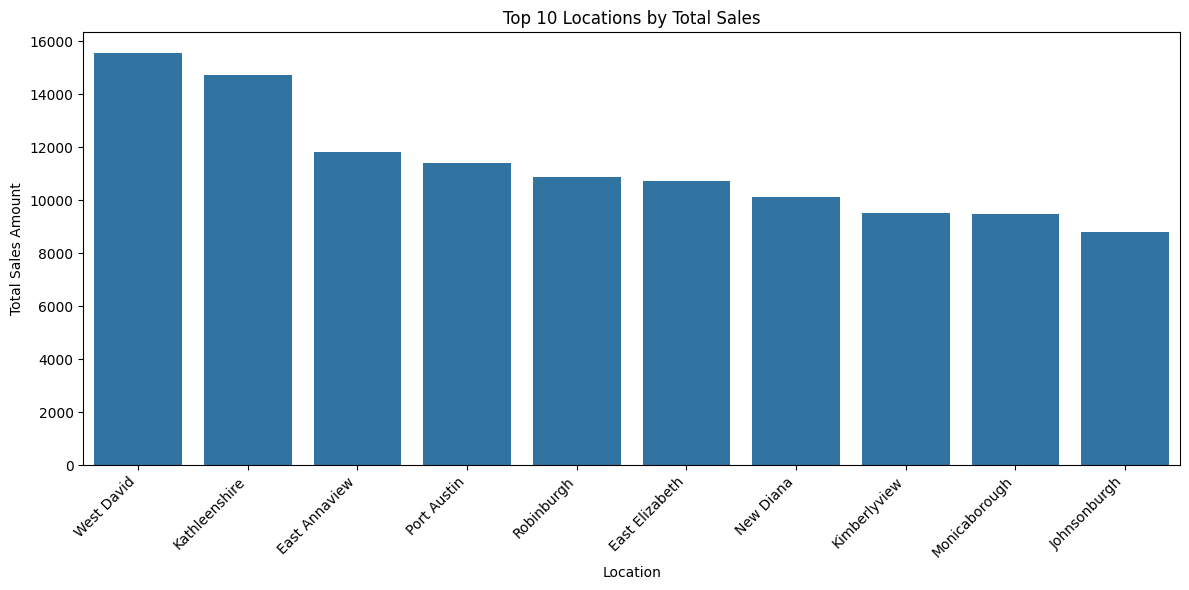

In [ ]:
# Group by 'Location' and sum the 'Amount'
sales_by_location = df.groupby('Location')['Amount'].sum().reset_index()

# Sort by total sales in descending order
sales_by_location = sales_by_location.sort_values('Amount', ascending=False)

# Select the top 10 locations
top_10_locations = sales_by_location.head(10)

# Create a bar plot for the top 10 locations
plt.figure(figsize=(12, 6))
sns.barplot(x='Location', y='Amount', data=top_10_locations)
plt.title('Top 10 Locations by Total Sales')
plt.xlabel('Location')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

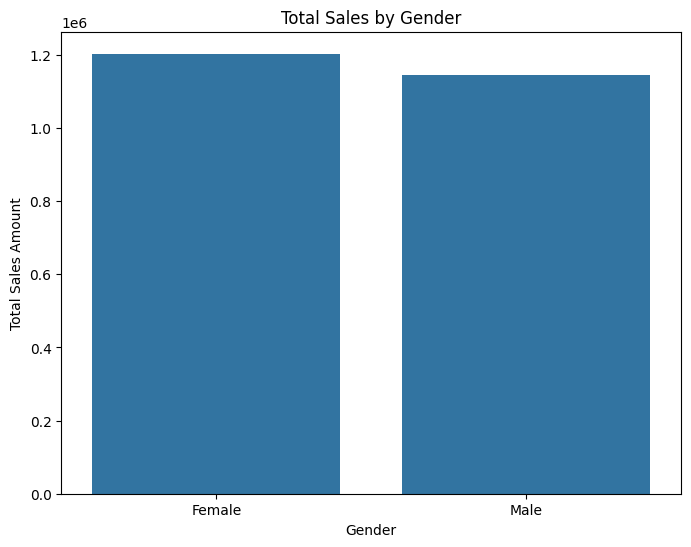

In [ ]:
sales_by_gender = df.groupby('Gender')['Amount'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Amount', data=sales_by_gender)
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales Amount')
plt.show()

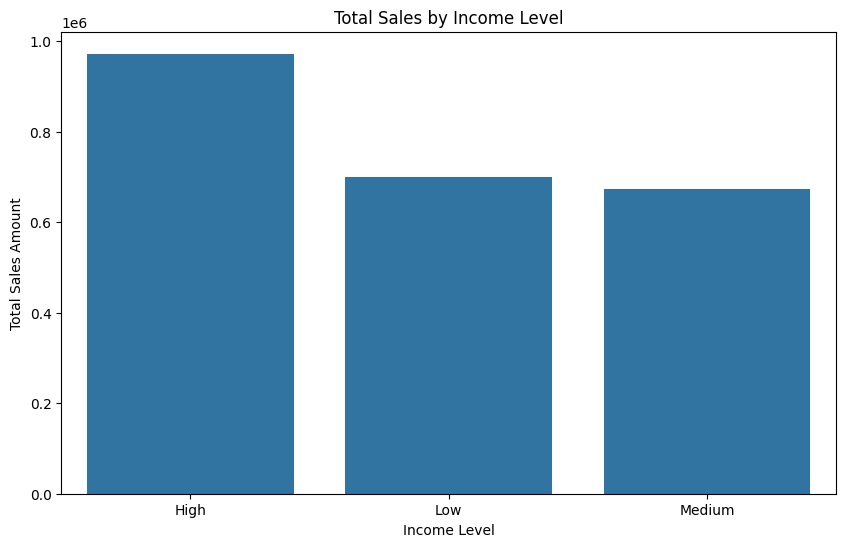

In [ ]:
# Group by 'IncomeLevel' and sum the 'Amount'
sales_by_income = df.groupby('IncomeLevel')['Amount'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='IncomeLevel', y='Amount', data=sales_by_income)

# Add title and labels
plt.title('Total Sales by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Total Sales Amount')

# Display the plot
plt.show()

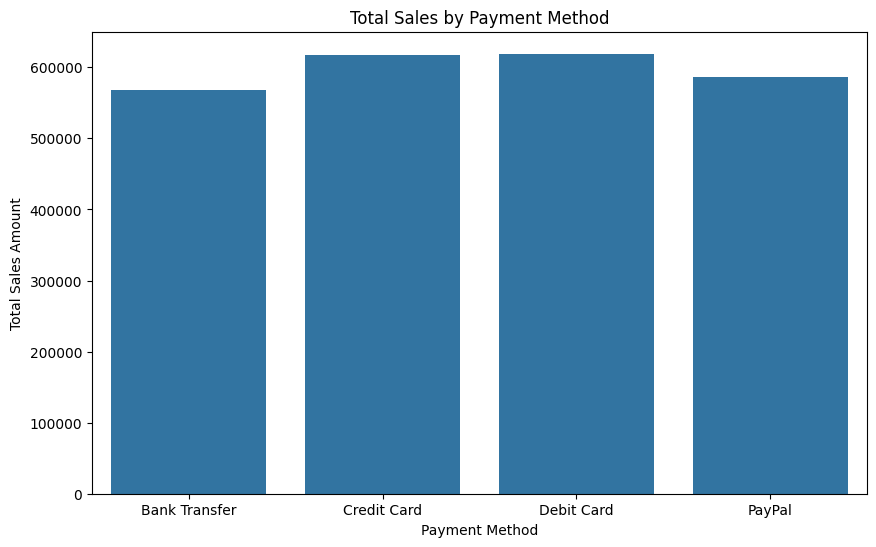

In [ ]:
sales_by_payment = df.groupby('PaymentMethod')['Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='PaymentMethod', y='Amount', data=sales_by_payment)
plt.title('Total Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales Amount')
plt.show()

## Perform statistical analysis

### Subtask:
Calculate and visualize the correlation matrix for numeric features ('Age', 'Amount').


**Reasoning**:
Create a DataFrame with only the 'Age' and 'Amount' columns and then calculate and visualize the correlation matrix using a heatmap.



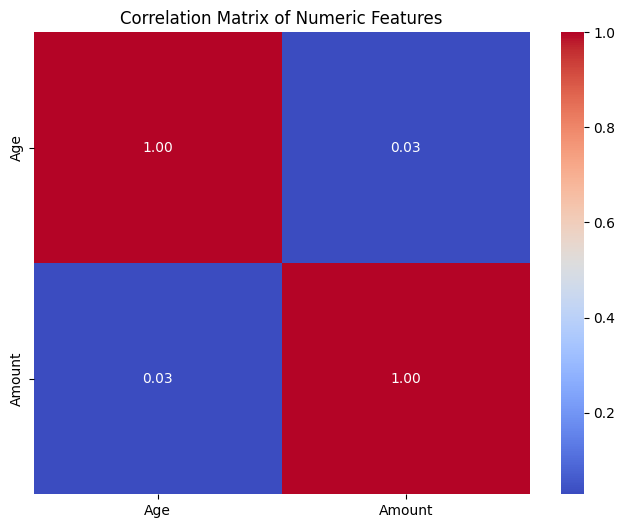

In [ ]:
# Create a DataFrame with only 'Age' and 'Amount'
numeric_df = df[['Age', 'Amount']].copy()

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [ ]:
# Select the categorical columns
categorical_columns = ['Gender', 'Location', 'IncomeLevel', 'ProductCategory', 'PaymentMethod', 'Platform', 'InteractionType', 'Sentiment']

# Create a new DataFrame with only these categorical columns
categorical_df = df[categorical_columns].copy()

# Iterate through each column and convert its data type to 'category'
for col in categorical_columns:
    categorical_df[col] = categorical_df[col].astype('category')

# Display the data types to verify the conversion
print("\nData types of categorical_df after conversion:")
display(categorical_df.dtypes)


Data types of categorical_df after conversion:


,0
Gender,category
Location,category
IncomeLevel,category
ProductCategory,category
PaymentMethod,category
Platform,category
InteractionType,category
Sentiment,category


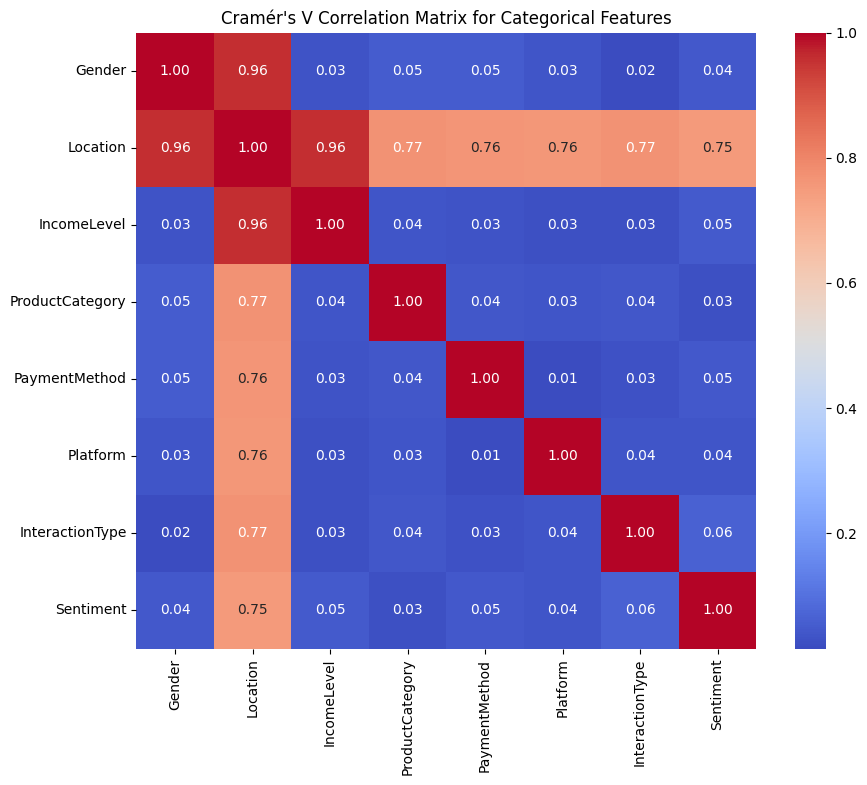

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(x, y):
    """Calculate Cramér's V statistic for categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    # Handle the case where k or r is 1 to avoid division by zero
    if k == 1 or r == 1:
        return 0
    v = np.sqrt(phi2 / min(k - 1, r - 1))
    return v

# Select the categorical columns
categorical_columns = ['Gender', 'Location', 'IncomeLevel', 'ProductCategory', 'PaymentMethod', 'Platform', 'InteractionType', 'Sentiment']

# Initialize an empty DataFrame for the Cramér's V matrix
v_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns, dtype=float)

# Iterate through all pairs of selected categorical columns and calculate Cramér's V
for col1 in categorical_columns:
    for col2 in categorical_columns:
        # Only calculate if there are non-null values in both columns
        if not df[col1].isnull().all() and not df[col2].isnull().all():
          v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
        else:
          v_matrix.loc[col1, col2] = np.nan # Or 0, depending on how you want to represent no data

# Generate a heatmap of the v_matrix
plt.figure(figsize=(10, 8))
sns.heatmap(v_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Cramér's V Correlation Matrix for Categorical Features")
plt.show()